<a href="https://colab.research.google.com/github/alanmlewis/ProgrammingforChem/blob/main/Y2_ML_for_Chemistry/Machine_Learning_for_Chemistry_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# To make a copy you can edit and save, go to File > Save a copy in Drive

# Section A: pKa, structure and reactivity

A recap of $\text{p}K_a$:

pKa is a measure of how good a Brønsted acid is at losing or keeping its proton.

The dissociation constant $K_a$ is greater when more dissociation has occurred:

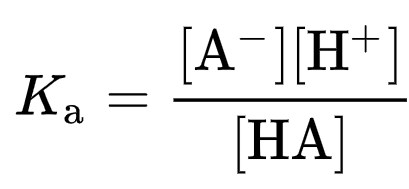

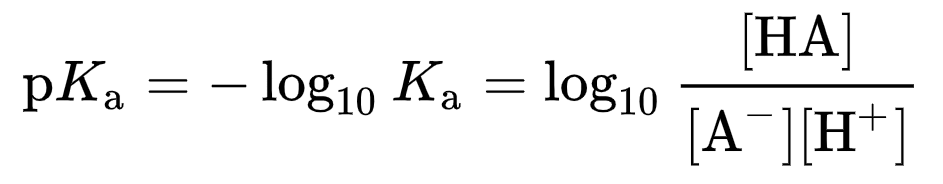

So the stronger the acid, the more dissociation, the higher the Ka, the lower the pKa.

pH defines how acidic the environment is. An acid with a pKa of 4 will remain protonated in an "acidic" environment of pH < 4, but will be deprotonated in a more "basic" environment.

The strength of a Brønsted acid (i.e. how willing it is to give up its proton) depends on its structure: acids are stronger when their conjugate bases are more stable. There are a few structural factors which affect the stability of the conjugate base directly:


- Electronegativity: within the same period, the more electronegative the anionic atom in the conjugate base, the better it is at accepting the negative charge.
  - e.g. CH3- ,  NH2- ,  HO- ,  F-


- Size: Larger ions are more stable than smaller ones, within the same group.
  - e.g. F- , Cl- , Br- ,   I-


- Resonance:  Delocalising negative charge across the molecule stabilises it.
  - e.g. RO- , RCO2-

It's useful to be able to predict pKa because it underpins choices we make about reaction conditions, as well as when we investigate mechanisms.

Datasets exist which have gathered experimental data, including pKa, for a huge range of known molecules. We can use these datasets to make predictions about unknown molecules.

There are a few ways to analyse this type of big dataset, including using Python to build a multiple regression model ourselves, but today we're focussing on using a machine learning algorithm to build the model for us.



## Section B: What is Machine Learning?

In "classic" programming, the human user writes a program and feeds the computer an input that the computer uses to create an output.

In machine learning, the human user chooses an algorithm and some "hyperparameters" (we'll discuss them later), then the computer produces a model for us using the dataset it was provided. Then this model can make predictions about unseen data.

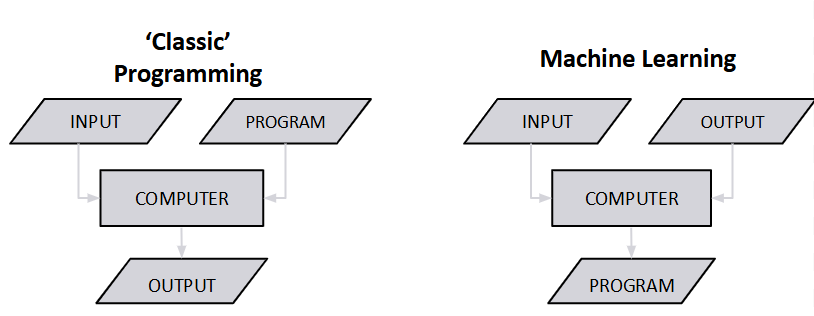

The code below:
- Reads a database from the internet
- Defines a machine learning model (chooses what type of model we'd like to build, we'll discuss this later too)
- Trains the model on the data we've provided
- Asks the model to predict some test molecules' pKas from their  structures.

**Exercise 1**: In this code, the model is predicting the pKa for molecules it hasn't seen before - i.e. not in the dataset the model learns from. See how well it predicted them! Then read through the script and try to understand what each section of code does.


In [ ]:
#-----Importing libraries-------------------------------------------------------

import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#-----Importing data------------------------------------------------------------

names = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/names_selected.txt',dtype=str,delimiter='%')
fingerprints = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/fingerprints_selected.txt')
pkas = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/pkas_selected.txt')

x = fingerprints
y = pkas
#-----Define the Machine Learning model-----------------------------------------

model = SVR(kernel = 'linear', C = 20, epsilon = 3)

#-----Train the model and assess its' prediction accuracy-----------------------

# Split the full dataset into a training set and a test set
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Fit the model
model.fit(x_train_full, y_train_full)

y_predict_test = model.predict(x_test)

# Test the accuracy of the model against the test set
accuracy = root_mean_squared_error(y_test, y_predict_test)
print(f'The root mean square error was {(accuracy)}!')

The root mean square error was 2.1441509496712867!


We can use the models we've trained to predict the pKa of specific molecules.

**Exercise 2**: Try and predict, using your chemical knowledge, the pKa of procodazole:

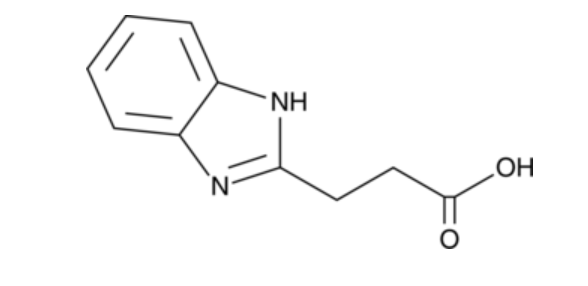

And for protonated hordenine:

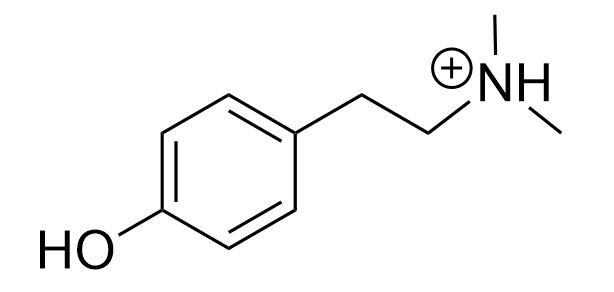

Which proton would come off first? How stable is the conjugate base? What is stabilising it?

Hint: Hordenine is amphoteric, so it can react as an acid and as a base. The shown molecule is the fully protonated state, which exists at the pH of human blood.

The code block below predicts the pKa value of a selected molecule. Procodazole has index 7 in the list of molecules, and protonated hordenine has index 78.

**Exercise 3**: For each of procodazole and hordenine:

- Edit the code block below so that the model is predicting for the correct molecule.
- Run the code block: How does the model's prediction compare to your intuition?

In [ ]:
#-----Importing libraries-------------------------------------------------------

import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#-----Importing data------------------------------------------------------------

names = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/names_selected.txt',dtype=str,delimiter='%')
fingerprints = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/fingerprints_selected.txt')
pkas = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/pkas_selected.txt')

x = fingerprints
y = pkas

print('Predicting the pKa of ', names[24])

#-----Define the Machine Learning model-----------------------------------------

model = SVR(kernel = 'linear', C = 20, epsilon = 3)

#-----Train the model and assess its' prediction accuracy-----------------------

# Split the full dataset into a training set and a test set
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Fit the model
model.fit(x_train_full, y_train_full)

y_predict = model.predict((fingerprints[24]).reshape(1, -1))

print(f'The predicted pKa value is {(y_predict)}')



Predicting the pKa of  Tryptamine
The predicted pKa value is [8.45061161]


## Section C: Learning Curves

Machine learning uses a given dataset to learn, and then makes predictions based off that learning.

Hopefully, it should follow that a model produced from more data is able to make more accurate predictions.

To test this, we can produce a learning curve: a plot of a model's prediction accuracy against how many samples the model was trained on.

e.g.
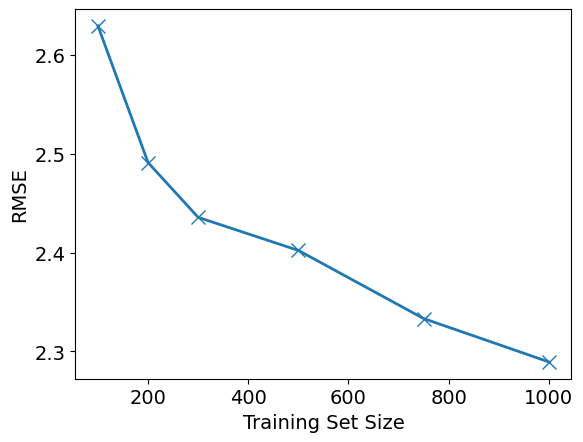


This is produced by taking a "slice" of your training dataset and training the model on that, then doing the same on bigger and bigger "slices" with more and more samples.

A reminder of RMSE:

Visually, we can evaluate roughly how good a fit is by seeing how close the lines look.

But if we want to make a comparison between similar looking fits, we need a quantitative measure of the error between the experimental data and our fit.

One way to do this is using the Root Mean Square Error (RMSE):

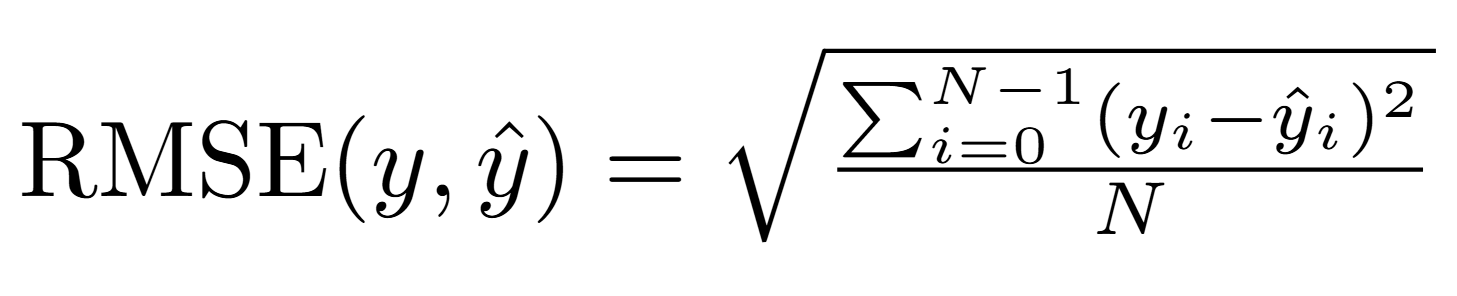


This is the Mean Squared Error (which we saw in the Kirchoff workshop), but square rooted so it's in the same units as the outputs - in our case, that's pKa.

**Exercise 1**: Edit the code below to define three new variables: `ntrain`, which should be a number less than 2000, and the variables `x_train_partial` and `y_train_partial`, which contain only the first `ntrain` rows of the training features (`x_train_full`) and the training pKas (`y_train_full`). How does the RMSE change compared to Exercise 1 in Section B?

Reminder: The first $m$ rows of a vector or matrix stored in a variable called `a` can be accessed using code like this: `a[:m]`.


In [ ]:
#-----Importing libraries-------------------------------------------------------

import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#-----Importing data------------------------------------------------------------

names = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/names_selected.txt',dtype=str,delimiter='%')
fingerprints = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/fingerprints_selected.txt')
pkas = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/pkas_selected.txt')

x = fingerprints
y = pkas
#-----Define the Machine Learning model-----------------------------------------

model = SVR(kernel = 'linear', C = 20, epsilon = 3)

#-----Train the model and assess its' prediction accuracy-----------------------

# Split the full dataset into a training set and a test set
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)



# Fit the model
model.fit(x_train_partial, y_train_partial)

y_predict_test = model.predict(x_test)

# Test the accuracy of the model against the test set
accuracy = root_mean_squared_error(y_test, y_predict_test)
print(f'The root mean square error was {(accuracy)}!')

The root mean square error was 2.1568194034587065%!


**Exercise 2**: Copy your code from Exercise 1 into the box below. Then, instead of using a single value of `ntrain`, add in a `for` loop to train a model using 100, 200, 500, 1000 and 1500 rows of the dataset. At the end of each loop, make sure you print out the RMSE, so you can see how the RMSE changes as the training set size changes.

Hint: If you need a reminder of how `for` loops works, there's a reminder at the end of this section, or refer back to your code from last workshop, or the Year 1 Python Notebook.


**Exercise 3**: In the code box above, create a new variable equal to an empty list before the start of your `for` loop. At the end of every loop, append the RMSE associated with that model onto the list you have created.

Hint: An example of this is in the `for` loops reminder below.

**Exercise 4**: Now add some code to the code block above which uses matplotlib to plot %RMSE against training sample size for each of your training sample sizes. What happens to the error as the number of samples increases?

Hint: You might want to use your code from the last workshop as a template for creating a graph, or there's a reminder below.

### A reminder of `for` loops:

`for` loops go through ("iterate over") each element in a list  and do an instruction on each element.

In [ ]:
# I'll define a couple of lists:

numbers = [2,4,6,8,10]
squares = []

# Then I'll square each of the items in "numbers" individually using a "for" loop.

# I'm appending each of the squares onto a list called "squares", which I can then print after the "for" loop's finished.
for i in numbers:
  square = i**2
  print(i,square)
  squares.append(square)

print(squares)


2 4
4 16
6 36
8 64
10 100
[4, 16, 36, 64, 100]


Details of the syntax:

- `for` loops begin with `for variable in list:`
- lists live in square brackets: `[]`
- the `for` loop "sees" any lines that have been indented. Select lines of code and press tab to indent.
- `accuracies.append(n)` appends ("sticks onto the end") the information stored in the variable n onto the list `accuracies`.

### A reminder of `matplotlib`:

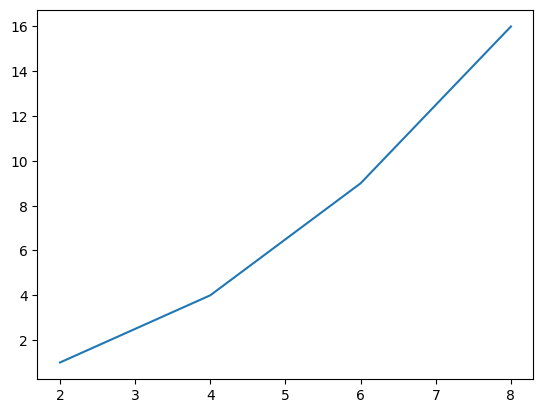

In [ ]:
import matplotlib.pyplot as plt # This is the library that includes the functions we'll use to plot graphs.

x = [2,4,6,8]
y = [1,4,9,16]

plt.plot(x,y) # This command produces a plot of list x against list y.
plt.show() # This displays the plot.

Matplotlib has many other functionalities to make your graph prettier, e.g. adding legends, axis titles, graph titles, or changing the graph's colours. Feel free to have a play around! Refer back to the [documentation](https://matplotlib.org/stable/tutorials/pyplot.html), or to the code you wrote for the Atmospheric Chemistry workshop for more guidance.

## Section D: What's actually happening when we press "go"?




We've seen that there's a "black box" which takes our data and builds a model. But what's actually happening?


Machine Learning for regression problems works as follows:

- A human (you!) chooses:
  - a learning algorithm, e.g. support vector regression
  - "hyperparameters" which define a loss function.

- The algorithm:
  - Chooses an initial guess for the parameters, e.g. m and c. These parameters define a model, but probably not a very good one.
  - Evaluates the "loss" of this model: A bigger loss value is a bigger punishment for the difference is between the model's predictions and the real life data.
  - Minimises the loss by changing the parameters and then evaluating the loss again and again, iteratively.
  - Outputs the optimised parameters. These define the "best" model within the limits your hyperparameters set out, i.e. with the smallest loss.

- The optimised model can be used to make predictions from unseen data.


## Section E: Hyperparameters

The machine learning algorithm completely depends on the **loss** calculated for each model.

The loss function contains **hyperparameters** which control the punishment for a model being inaccurate.

In support vector regression, the aim is to find a **hyperplane** (like a line or plane, but in many dimensions) which fits the datapoints as well as possible.

This is achieved by choosing two hyperparameters:
- **ε**: This is the how far away a point can be away from the hyperplane before punishment. Defines a **decision boundary** - a tube which we want to contain most of the datapoints. The further datapoints are outside the tube, the bigger the punishment.
- **C**: This is how big the punishment is for being outside the decision boundary.


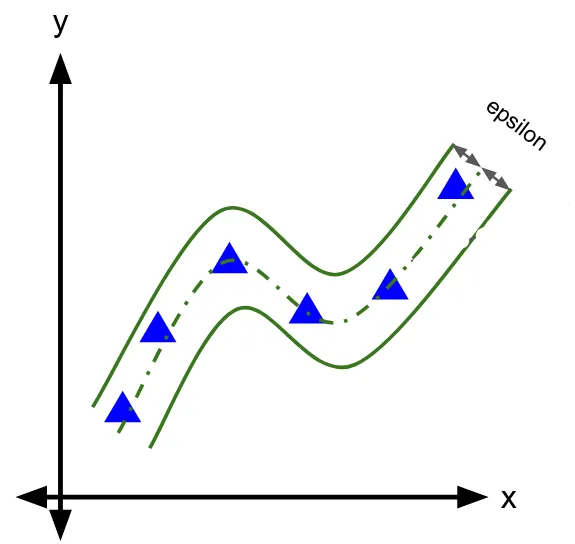

A big C and a small ε mean a small decision boundary and a large punishment for being outside it. This can lead to overfitting.

A small C and a big ε mean a large decision boundary and a small punishment for being outside it. This can lead to underfitting, i.e. a bad model.






**Exercise 1**: Try and change your hyperparameters in the code below so that your model is making predictions with the most error, and the least error. What's the highest and lowest you can get it?

Hint: Changing hyperparameters in small increments of 1 or 2 might not have a very big effect. Start by varying them by orders of magnitude.


In [ ]:
#-----Importing libraries-------------------------------------------------------

import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#-----Importing data------------------------------------------------------------

names = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/names_selected.txt',dtype=str,delimiter='%')
fingerprints = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/fingerprints_selected.txt')
pkas = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/pkas_selected.txt')

x = fingerprints
y = pkas
#-----Define the Machine Learning model-----------------------------------------

model = SVR(kernel = 'linear', C = 20, epsilon = 3)

#-----Train the model and assess its' prediction accuracy-----------------------

# Split the full dataset into a training set and a test set
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Fit the model
model.fit(x_train_full, y_train_full)

y_predict_test = model.predict(x_test)

# Test the accuracy of the model against the test set
accuracy = root_mean_squared_error(y_test, y_predict_test)
print(f'The root mean square error was {(accuracy)}!')

The root mean square error was 2.1441509496712867!


**Exercise 2**: Put the best hyperparameters you have found into your code which creates the learning curve in Section C. What happens to the learning curve?


**Exercise 3**:
- What variable contains all of the known pKas for our data samples in the "test" set?
- What variable contains all of our predicted pKas which our model produced?

Use `matplotlib` and modify the code block above to plot a "parity" graph - this is a scatter graph which plots "real pKa" on the $x$ axis against "predicted pKa" on the $y$ axis.

Hint: `plt.scatter` produces a scatter plot.

**Exercise 4**: Add a line to your scatter plot which plots `y_test` against itself, to show what the plot would look like if the model made perfect predictions.

You can use `plt.plot` to draw a straight line, and change the colour of your line by adding the argument `color=` to your code.

**Exercise 5**: Now you have optimised your hyperparameters, try running the code blocks below to find the predicted pKa for procodazole using the "best" hyperparameters. How does the output change? Is this prediction more or less reliable than before?

In [ ]:
#-----Importing libraries-------------------------------------------------------

import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#-----Importing data------------------------------------------------------------

names = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/names_selected.txt',dtype=str,delimiter='%')
fingerprints = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/fingerprints_selected.txt')
pkas = np.loadtxt('https://raw.githubusercontent.com/alanmlewis/ProgrammingforChem/refs/heads/main/Y2_ML_for_Chemistry/pkas_selected.txt')

x = fingerprints
y = pkas

print('Predicting the pKa of ', names[24])

#-----Define the Machine Learning model-----------------------------------------

model = SVR(kernel = 'linear', C = 20, epsilon = 3)

#-----Train the model and assess its' prediction accuracy-----------------------

# Split the full dataset into a training set and a test set
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Fit the model
model.fit(x_train_full, y_train_full)

y_predict = model.predict((fingerprints[24]).reshape(1, -1))

print(f'The predicted pKa value is {(y_predict)}')

**Extension Exercise**: Many other machine learning algorithms exist for solving this type of regression problem. Using the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor), have a go at swapping Support Vector Regression with Random Forest Regression in the code cell for Exercise C.2. Can you get the error any lower? What does your learning curve now look like?


**Extension Exercise**: Using online resources and your previous workshops, can you:
- add a line of best fit to your scatter plot
- using your lines, can you discuss whether the model's predictions have a good enough correlation with the true pKa values?  